# Twitter: An Analysis of Linguistic Diversity

## Part IV

This particular database was collecting tweets between middle of January through the middle of May. So there is a time dimension to these data. If we glance back at the first tweet notebook, we see that there is an attribute named `created_at`. This is a timestamp of when the tweet was published for the world to see.

Adding a time component to an analysis gives us the option to follow trends. When are hashtags popular? How quickly do they die? For our linguistic diversity analysis, it certainly begs for a modified analysis.

Quick question: Would accounting for time when calculating a shannon index on a city have any effect? Would cities stay stable throughout time in regards to their linguistic diversity? Are some cities more prone to fluctuations than others? Well, a timestamp allows us to explore these questions and more.

----

Today we are going to be comparing two different cities: New York City, New York and Columbia, Missouri. By now you are probably aware that the job id for Columbia is 261. But what is the job id for New York City.  That is a simple query of the job table. 

In [1]:
# BE SURE TO RUN THIS CELL BEFORE ANY OF THE OTHER CELLS

import psycopg2
import pandas as pd
from skbio.diversity.alpha import shannon

In [2]:
# query database
statement = """
SELECT * 
FROM twitter.job
WHERE description LIKE '%New York City%';
"""

try:
    connect_str = "dbname='twitter' user='dsa_ro_user' host='dbase.dsa.missouri.edu'password='readonly'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    cursor = conn.cursor()
    cursor.execute(statement)
    
    column_names = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
    
# create dictionary from the rows and column names   
new_york = {}
for i in list(range(len(column_names))):
     new_york['{}'.format(column_names[i])] = [x[i] for x in rows]

# turn dictionary into a data frame
pd.DataFrame(new_york)

,analysis_state,description,job_id,last_count,last_run,oauth_id,query,since_id_str,state,zombie_head
0,0,"New York City, New York",291,3799,2017-05-18 14:49:19,4,"q=&geocode=40.7127837,-74.00594129999999,40km",865292001268436992,32,6


So above we use the `LIKE` statement in conjunction with the `%` sign. The `LIKE` operator is going to match a string while the `%` matches any string of 0 or greater length. If you know the exact match then you needn't use the `%` sign.

## <span style="background-color: #FFFF00">YOUR TURN</span>

**PRACTICE**: Just a refresher. Query the 10,000 tweets from the tweet table where the `job_id` corresponds to New York City. Be sure to also select the the `description` column from the `job` table so that every record returned has a `description` saying "New York City, New York.


In [3]:
# put your code here
# ------------------

# query database
statement = """
SELECT j.description, t.*
FROM twitter.job j, twitter.tweet t
WHERE j.description LIKE '%New York City%' AND j.job_id = t.job_id
LIMIT 10000;
"""

try:
    connect_str = "dbname='twitter' user='dsa_ro_user' host='dbase.dsa.missouri.edu'password='readonly'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    cursor = conn.cursor()
    cursor.execute(statement)
    
    column_names = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
    
# create dictionary from the rows and column names   
new_york = {}
for i in list(range(len(column_names))):
     new_york['{}'.format(column_names[i])] = [x[i] for x in rows]

# turn dictionary into a data frame
pd.DataFrame(new_york)

,analysis_state,created_at,description,from_user,from_user_created_at,from_user_favorites,from_user_followers,from_user_following,from_user_fullname,from_user_id_str,...,job_id,location_geo,location_geo_0,location_geo_1,source,text,to_user,to_user_id_str,to_user_name,tweet_id_str
0,0,2017-02-24 01:04:21,"New York City, New York",2905763033,2014-12-05 00:11:06,3222,621,304,muÃ±eca,2905763033,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",RT @trinnyyy__: @jerryyrich https://t.co/rRB1T...,None,None,None,834931939408822272
1,0,2017-02-24 01:04:21,"New York City, New York",364652604,2011-08-30 03:12:51,29166,889,366,Amelia Thorngate,364652604,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",RT @hopeTGOD: https://t.co/YzFURpsoZH,None,None,None,834931942340579328
2,0,2017-02-24 01:04:21,"New York City, New York",433954531,2011-12-11 07:05:56,1120,750,183,Drippy 2x,433954531,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",Lmaooo https://t.co/SpzM9P775M,None,None,None,834931938590867457
3,0,2017-02-24 01:04:20,"New York City, New York",14608191,2008-05-01 00:25:19,15542,797,1262,Rainbow Doom,14608191,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...","@MorganL666 @GrumpyTheology Oh Pence, definite...",2321682552,2321682552,MorganL666,834931936455966725
4,0,2017-02-24 01:04:20,"New York City, New York",4004931792,2015-10-24 18:33:43,84,334,1,The Rumor,4004931792,...,291,None,None,None,"<a href=""http://www.botize.com"" rel=""nofollow""...","Pero LopezObrador rechazÃ³ debatir, dice que p...",None,None,None,834931936820879360
5,0,2017-02-24 01:04:20,"New York City, New York",1510127773,2013-06-12 10:18:18,4906,1814,542,Steph Royalty,1510127773,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",Lmao I've missed you https://t.co/pD1lqGn4gf,None,None,None,834931936929939456
6,0,2017-02-24 01:04:20,"New York City, New York",291427983,2011-05-02 00:37:20,2739,426,606,Jess,291427983,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",RT @abbn0rmal_: People will swear on anything ...,None,None,None,834931937055768576
7,0,2017-02-24 01:04:20,"New York City, New York",382475814,2011-09-30 04:11:04,6651,184,347,terry johnson,382475814,...,291,None,None,None,"<a href=""http://twitter.com/download/android"" ...",RT @HillaryClinton: If you can't stand the hea...,None,None,None,834931937114476544
8,0,2017-02-24 01:04:20,"New York City, New York",2596152405,2014-06-09 22:18:24,404,56,87,Dr Farasat,2596152405,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",RT @JoyAnnReid: Exaxtly. And back then all we ...,None,None,None,834931937227784193
9,0,2017-02-24 01:04:20,"New York City, New York",466129515,2012-01-17 02:56:49,8165,440,213,15 days areej,466129515,...,291,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",RT @ltsKermit: people: you're so quiet \\n\\...,None,None,None,834931937357639681


**A Couple Things to Think About**

When dealing with timestamps, the timestamp itself is often too precise to extract anything meaningful. Therefore, we generally have to bin them into larger time buckets, say weeks, months or even years depending on the amount of data and the type of problem. That is where we find ourselves right now. 

To start, we are going to practice using Postgres to creat columns of month and year so that we can do some aggregations on them. 

In [4]:
# query database
statement = """
SELECT t.*,
       date_part('month',created_at) as month,
       date_part('year', created_at) as year
FROM twitter.job j, twitter.tweet t
WHERE j.description LIKE '%New York City%' AND j.job_id = t.job_id
LIMIT 1000;
"""

try:
    connect_str = "dbname='twitter' user='dsa_ro_user' host='dbase.dsa.missouri.edu'password='readonly'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    cursor = conn.cursor()
    cursor.execute(statement)
    
    column_names = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
    
# create dictionary from the rows and column names   
new_york = {}
for i in list(range(len(column_names))):
     new_york['{}'.format(column_names[i])] = [x[i] for x in rows]

# turn dictionary into a data frame
pd.DataFrame(new_york)

,analysis_state,created_at,from_user,from_user_created_at,from_user_favorites,from_user_followers,from_user_following,from_user_fullname,from_user_id_str,from_user_name,...,location_geo_0,location_geo_1,month,source,text,to_user,to_user_id_str,to_user_name,tweet_id_str,year
0,0,2017-02-24 13:20:41,1441848320,2013-05-19 18:04:10,483,347,610,Ryan Gerrity,1441848320,RyanGerrity,...,None,None,2.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","#QuoteOfTheDay ""The best way to predict the fu...",None,None,None,835117243973402624,2017.0
1,0,2017-02-24 13:20:41,1296351806,2013-03-24 19:24:13,2,1463,1449,garat-secretariat.fr,1296351806,JacquesGarat64,...,None,None,2.0,"<a href=""http://linkis.com"" rel=""nofollow"">Put...",apporteur d-affaires 25 #Doubs https://t.co/M5...,None,None,None,835117244472492032,2017.0
2,0,2017-02-24 13:20:41,480577804,2012-02-01 17:14:26,244,131,526,Nate Krumpos,480577804,N_Krumpos,...,None,None,2.0,"<a href=""http://www.tweetcaster.com"" rel=""nofo...","RT @TimOBrien: Bannon, Trump and the chaos the...",None,None,None,835117244606722048,2017.0
3,0,2017-02-24 13:20:41,1855363850,2013-09-11 20:19:41,13,1774,2310,Magesy-Pro,1855363850,magesy_pro,...,None,None,2.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Vocal Hits WAV MiDi-DiSCOVER https://t.co/2CO...,None,None,None,835117244606787584,2017.0
4,0,2017-02-24 13:20:41,1102207075,2013-01-18 22:38:59,620,463,852,BilmediÄini Bilen,1102207075,Bilen_us,...,None,None,2.0,"<a href=""http://twitter.com/download/android"" ...",RT @SelcukRSirin: ÃÄ±ktÄ±! https://t.co/J6dVl...,None,None,None,835117245277814785,2017.0
5,0,2017-02-24 13:20:41,3346212609,2015-06-26 04:35:41,80,722,74,ã­ã³æ¯ã¨åä¸»ã¨ãã¥ã¼ã¨ã¼ã¯,3346212609,longebose,...,None,None,2.0,"<a href=""http://twitter.com/download/iphone"" r...",ãããã«56ä¸ã¯ã¢ããã\\n\\nhttps://...,3346212609,3346212609,longebose,835117245370097665,2017.0
6,0,2017-02-24 13:20:41,3261398631,2015-05-16 13:51:47,55156,3372,4988,Mark Houlsby,3261398631,HoulsbyMark,...,None,None,2.0,"<a href=""http://twitter.com/download/android"" ...",RT @NotifyNYC: AMBER Alert: Aylin Sofia Hernan...,None,None,None,835117245667897344,2017.0
7,0,2017-02-24 13:20:41,465478461,2012-01-16 11:49:08,2816,91319,36640,Emprendedores,465478461,EmprenderGM,...,None,None,2.0,"<a href=""http://www.botize.com"" rel=""nofollow""...",La nueva tendencia âjob hoppingâ de los jÃ...,None,None,None,835117245915348993,2017.0
8,0,2017-02-24 13:20:41,714495646078779392,2016-03-28 16:53:31,551,148,242,Papi Jay,714495646078779392,jarrielis_ayala,...,None,None,2.0,"<a href=""http://twitter.com/download/iphone"" r...",me asf https://t.co/CNNjY9JyAK,None,None,None,835117245927936000,2017.0
9,0,2017-02-24 13:20:41,823715410935586817,2017-01-24 02:13:52,0,821,4359,Concha Dorset,823715410935586817,concha_dorset,...,None,None,2.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Chinese Farmer Makes Pigs Dive Into Water So &...,None,None,None,835117245940408320,2017.0


Now we can apply our counting of languages per month. Now that we have month and year columns, we just need to add that to our `GROUP BY` clause like so...

In [5]:
# query database
statement = """
SELECT DISTINCT iso_language,month,year , COUNT(*) FROM 
(SELECT t.*,
       date_part('month',created_at) as month,
       date_part('year', created_at) as year
FROM twitter.job j, twitter.tweet t
WHERE j.description LIKE '%New York City%' AND j.job_id = t.job_id
LIMIT 100000) AS new_york
GROUP BY iso_language ,month, year;
"""

try:
    connect_str = "dbname='twitter' user='dsa_ro_user' host='dbase.dsa.missouri.edu'password='readonly'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    cursor = conn.cursor()
    cursor.execute(statement)
    
    column_names = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
    
# create dictionary from the rows and column names   
new_york = {}
for i in list(range(len(column_names))):
     new_york['{}'.format(column_names[i])] = [x[i] for x in rows]

# turn dictionary into a data frame
pd.DataFrame(new_york)


,count,iso_language,month,year
0,5,hu,2.0,2017.0
1,26,cy,2.0,2017.0
2,4177,und,2.0,2017.0
3,109,de,2.0,2017.0
4,5,is,2.0,2017.0
5,11,vi,2.0,2017.0
6,29,uk,2.0,2017.0
7,30,zh,2.0,2017.0
8,77,pl,2.0,2017.0
9,451,ja,2.0,2017.0


Well, it looks like limiting by 100,000 rows only gives a single month. That's not that interesting. What if we decrease the scope of time a little bit? Let's say by week of the year.

## <span style="background-color: #FFFF00">YOUR TURN</span>

Count the number of languages in New York City per week of the year. Turn that into a data frame and call it `week_ny`. If you need some documentation on how to get the week from a timestamp field, look here (https://www.postgresql.org/docs/8.0/static/functions-datetime.html).

In [6]:
# put your code here
# ------------------

# query database
statement = """
SELECT DISTINCT iso_language,week,year , COUNT(*) FROM 
(SELECT t.*,
       date_part('week',created_at) as week,
       date_part('year', created_at) as year
FROM twitter.job j, twitter.tweet t
WHERE j.description LIKE '%New York City%' AND j.job_id = t.job_id
LIMIT 1000000) AS new_york
GROUP BY iso_language ,week, year;
"""

try:
    connect_str = "dbname='twitter' user='dsa_ro_user' host='dbase.dsa.missouri.edu'password='readonly'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    cursor = conn.cursor()
    cursor.execute(statement)
    
    column_names = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
    
# create dictionary from the rows and column names   
new_york = {}
for i in list(range(len(column_names))):
     new_york['{}'.format(column_names[i])] = [x[i] for x in rows]

# turn dictionary into a data frame
week_ny = pd.DataFrame(new_york)

## <span style="background-color: #FFFF00">YOUR TURN</span>

From the `week_ny` data frame that you created above, now find the shannon index for each week.

In [7]:
# put your code here
# ------------------


week_ny['count'].groupby(week_ny['week']).apply(shannon)

week
8.0     0.933881
9.0     0.896749
10.0    0.942359
11.0    1.030654
Name: count, dtype: float64

Even weeks are rather few. So let's take a look at days. Keep in mind that this next query could take a few minutes. 

In [8]:
# query database
statement = """
SELECT DISTINCT iso_language,day,month,year , COUNT(*) FROM 
(SELECT t.*,
       date_part('day',created_at) as day,
       date_part('month', created_at) as month,
       date_part('year', created_at) as year
FROM twitter.job j, twitter.tweet t
WHERE j.description LIKE '%New York City%' AND j.job_id = t.job_id
LIMIT 1000000) AS new_york
GROUP BY iso_language ,day,month, year;
"""

try:
    connect_str = "dbname='twitter' user='dsa_ro_user' host='dbase.dsa.missouri.edu'password='readonly'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    cursor = conn.cursor()
    cursor.execute(statement)
    
    column_names = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
    
# create dictionary from the rows and column names   
new_york = {}
for i in list(range(len(column_names))):
     new_york['{}'.format(column_names[i])] = [x[i] for x in rows]

# turn dictionary into a data frame
day_ny = pd.DataFrame(new_york)

We can use the `head` method to see what this data frame looks like.

In [9]:
day_ny.head()

,count,day,iso_language,month,year
0,45,13.0,ru,3.0,2017.0
1,630,28.0,ja,3.0,2017.0
2,5,16.0,el,3.0,2017.0
3,34711,16.0,en,3.0,2017.0
4,14,26.0,fa,3.0,2017.0


And now we can find shannon for each day...

In [10]:
date_ny = day_ny.groupby(['day','month','year'])['count'].apply(shannon).reset_index()

We also want the day, month, and year columns to be one date column. We can do that by using the `to_datetime` method and specify the columns that contribute to the date. We will call this new column `date`.

In [11]:
date_ny['date'] = pd.to_datetime(date_ny.year*10000+date_ny.month*100+date_ny.day,format='%Y%m%d')
# nicer column name
date_ny['shannon'] = date_ny['count']

Let's glimpse at what this gave us...

In [16]:
date_ny.head()

,day,month,year,count,date,shannon
0,13.0,3.0,2017.0,0.864325,2017-03-13,0.864325
1,14.0,3.0,2017.0,0.977634,2017-03-14,0.977634
2,15.0,3.0,2017.0,0.876521,2017-03-15,0.876521
3,16.0,3.0,2017.0,0.882064,2017-03-16,0.882064
4,17.0,3.0,2017.0,0.915172,2017-03-17,0.915172


**AND FINALLY**...

...we want to plot this relationship between date and shannon. 

In [13]:
%matplotlib inline

#import matplotlib
#import numpy as np
#import matplotlib.pyplot as plt

`pandas` actually has matplotlib built in so that we can plot relationships. In this case, the date is going to be the x-axis and shannon will be the y-axis. `pandas` likes the x-axis to be the index of the data frame, so we first want to subset the data to be only the columns we want to plot, and then set the index to `date`. After that, we just call the `plot` method like so...

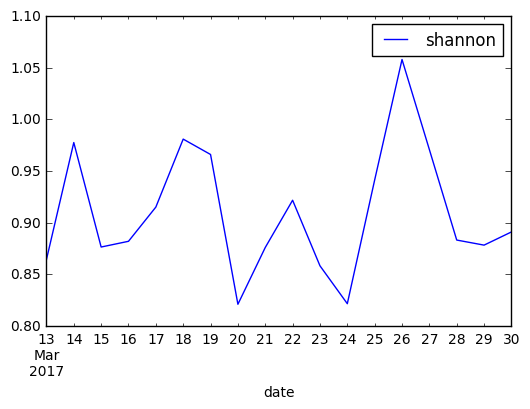

In [17]:
date_ny[['date','shannon']].set_index('date').plot()

## <span style="background-color: #FFFF00">YOUR TURN</span>

Now, do the same for Columbia, MO. Be sure to find the day, month and year and to count the languages based on day. Finally plot your results after calculating the shannon index per day.

In [ ]:
# put your code here
# ------------------

